This is the Titanic ship wreck data related to Kaggle titanic competition.


## 1. Import necessary libraries 

In [1]:
import pandas as pd #package for data analysis
import numpy as np #package for scientific computing
import seaborn as sns # package for dat visualization
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

# This helps not to see warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Explore the data

In [34]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

let's make a list containing the whole data so that we can clean both the train and test data at once.

In [35]:
combine=[df_train,df_test] # list containing whole data
print('df_train size', df_train.shape,'-- df_test size', df_test.shape)

df_train size (891, 12) -- df_test size (418, 11)


Train data has 12 columns including the 'Survival' column that we need to predict for the test data set. Let's look at the train data.

In [36]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df_train.describe(include="all") # get statistical analysis of the data frame "train"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Observations: 

#### Train data

    1. PASSENGERID: We have 891 passenger data.
    
    2. SURVIVED : 0 for dead and 1 for survived
    
    3. PCLASS: There can be a higher chance of survival for higher class passengers because they usually get priority over middle class and 3rd class.
    
    4. NAME: We can extract information of passengers age from 'Name' column. So this would be helpful when filling out missing values of 'Age' column.
    
    5. AGE: There are information missing in features "Age"( ~ 20% missing). Recorded ages are between 0.4 - 80 years. In order to fill "Age" column it would be helpful to see what features correlate with Age feature.
    
    6. SibSp (Sibilings on board) and Parch ( Parents and child) can be combined together as the information is related.
    
    7. TICKETNO: There are 681 unique ticket numbers out of recorded 891 ticket numbers meaning some passengers shared the tickets. however, this information is not relevant and can be dropped out.
    
    8. FARE: Higher fare may probably implying 1st class passengers. They could have higher survival rate. Therefore it would be helpful to group fare values and assign categorical values. 
    
    9. CABIN: There are information missing in features "Cabin" (~ 80% missing ). Cabin feature can not be recovered as 80% of the data is missing and therefore can be dropped out. OR
       We can assume that the recorded cabin numbers are mostly from survived passengers. In that case we can assign categorical variables. OR
       It is logical to assume that the passengers who didn't have cabin numbers are 3rd class passengers because, they usually shared a room.
       #### however, as 80% data is missing, I drop Cabin feature.
    
    4. EMBARKED: Embarked feature has 3 missing data and can assign mean or mode to recover them.

In [38]:
df_test.describe(include='all')  # get statistical analysis of the data frame "train"

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Stokes, Mr. Philip Joseph",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


#### Test data
    1. We have 418 passenger data. All the cleaning steps discussed above can be applied to the test set as well. 
    
    2. 'Fare' feature is missing 1 value. it can be recovered by replacing NaN with mean or mode. however, If there were more values were misssing that just 1, I would probably get the mean values of pclass groups to replace them.


## 3.Data Wrangling

Let's first drop irrelevant columns: Ticket and Cabin

In [39]:
for df in combine:
    df.drop(['Ticket','Cabin'],axis=1,inplace=True)
        
print('df_train size', df_train.shape,'-- df_test size', df_test.shape)

df_train size (891, 10) -- df_test size (418, 9)


#### Sibsp and Parch feature

Then, we can create a new column called "Family_Counts" by adding Parch and SibSp together. New column "Family_Counts" have values ranging from 0 to some positive value.
We assign 0 to passengers with family and 1 to passengers traveled  alone. Let's name this new categorical feature as "Alone"

In [40]:
for df in combine:
    df['Family_Counts']=df['SibSp']+df['Parch']+1 # combine sibsp and Parch, value 1 represent traveled alone passengers
    df['Alone']=0 # Assign 0 to all entries
    df.loc[df['Family_Counts']==1,'Alone']=1 # Assign 1 to passengers travelled alone.
    df.drop(['SibSp','Parch','Family_Counts'],axis=1,inplace=True) # drop 'SibSp','Parch','Family_Counts' in favor of 'Alone'

#### Embarked Feature

We still need to deal with missing values. It is a insightful to fill the missing values of Embarked column with its' mode.

In [41]:
for df in combine:
    df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) # fill missing values in embarked with it's mode.

#### Fare feature

Here I filled missing values with it's mean value as there is only one missing value reported in the 'Fare' column in test data. However, if there numerous missing values were presented, we could have taken the group mean value based on Pclass to fill them.

In [42]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True) 

From the above statistical analysis details,the minimum, 1st quartile, median, 3rd quartile and maximum values of Fare in test/train dataset are (nearly)0 , 8, 15 , 31 and 513. let's group the fare in to 4 groups based on these values and assign categorical variables to each group.

In [43]:
bins1=[-1,8,15,31,513]
labels1=['F1','F2','F3','F4']
for df in combine:
    df['FareGroup']=pd.cut(df["Fare"],bins1,labels=labels1)

In [44]:
for df in combine:
    df.drop(['Fare'],axis=1,inplace=True)

#### Sex feature

We assign 0 for males and 1 for females.

In [45]:
for df in combine:
    df['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

So our train set and test set looks like this.

In [46]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Alone,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,S,0,F1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,C,0,F4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,S,1,F1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,S,0,F4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,S,1,F2


In [47]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked,Alone,FareGroup
0,892,3,"Kelly, Mr. James",0,34.5,Q,1,F1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,S,0,F1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,Q,1,F2
3,895,3,"Wirz, Mr. Albert",0,27.0,S,1,F2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,S,0,F2


## 4. Data Visualization 

In [48]:
# gives number of not NAN values of each columns
print(df_train.info())
print('____________________')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
Embarked       891 non-null object
Alone          891 non-null int64
FareGroup      891 non-null category
dtypes: category(1), float64(1), int64(5), object(2)
memory usage: 56.9+ KB
None
____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
Embarked       418 non-null object
Alone          418 non-null int64
FareGroup      418 non-null category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 23.6+ KB
None


#### Age Feature

We still need to fill missing values of 'Age'. Let's find out which features correlate with age. 

First we extract information from Name column to see weather it has a correlation with age. to do that we can make another column called Title instead of their names.

In [49]:
for df in combine:
    df['Title']=df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

    df['Title']=df['Title'].replace(['Mlle', 'Ms'],'Miss')
    df['Title']=df['Title'].replace(['Mrs','Mme'],'Mrs')
    df['Title']=df['Title'].replace(['Don','Rev','Dr','Col', 'Capt','Jonkheer','Major'],'Rare')
    df['Title']=df['Title'].replace(['Lady', 'Sir','Countess'],'Royal')

    df['Title'].replace(to_replace=['Master','Miss','Mr','Mrs','Rare','Royal'],value=[1,2,3,4,5,6],inplace=True)
    df.drop(['Name'],axis=1,inplace=True)

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Alone,FareGroup,Title
0,1,0,3,0,22.0,S,0,F1,3
1,2,1,1,1,38.0,C,0,F4,4
2,3,1,3,1,26.0,S,1,F1,2
3,4,1,1,1,35.0,S,0,F4,4
4,5,0,3,0,35.0,S,1,F2,3


In [51]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,Alone,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,0.057462,0.080950
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.203367,-0.064852
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.135207,-0.185272
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,-0.303646,-0.056694
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,0.198270,0.505582
Alone,0.057462,-0.203367,0.135207,-0.303646,0.198270,1.000000,0.015047
Title,0.080950,-0.064852,-0.185272,-0.056694,0.505582,0.015047,1.000000


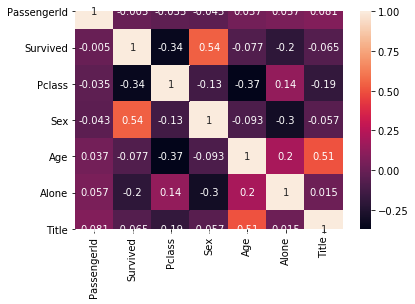

In [52]:
sns.heatmap(df_train.corr(),annot=True)

Age is moderately correlate with 'Title' and 'Pclass' . We can use visualization to check this out as well.

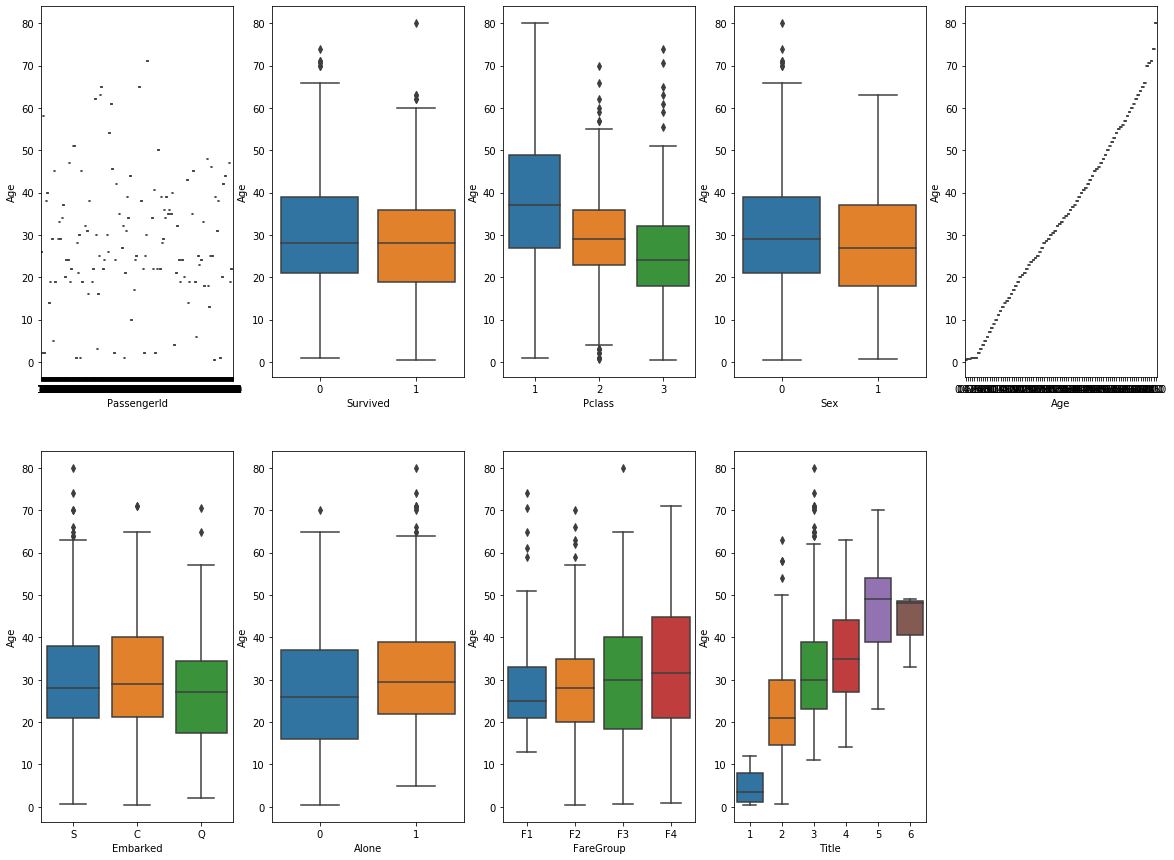

In [53]:
plt.figure(figsize=(20,15))
for i, col in enumerate(df_train.columns):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=col,y='Age',data=df_train)

Let's group under Pclass and Title and get the mean age corresponding to each group.

In [54]:
group1=df_train[['Pclass','Title','Age']].groupby(['Pclass','Title'],as_index=False).mean()
group1.head(10)

,Pclass,Title,Age
0,1,1,5.306667
1,1,2,29.744681
2,1,3,41.580460
3,1,4,40.400000
4,1,5,48.727273
5,1,6,43.333333
6,2,1,2.258889
7,2,2,22.560606
8,2,3,32.768293
9,2,4,33.682927


Let's use this mean age values to fill missing data

In [55]:
for df in combine:
    df['Age'].fillna(df.groupby(['Pclass','Title']).transform('mean').Age, inplace=True)

Now we can make 'Age groups' column. Let's use pandas cut method as before.

In [57]:
bins2=[0,2,10,20,30,60,100]
labels2 = ['baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
for df in combine:
    df['AgeGroup'] = pd.cut(df["Age"], bins2, labels = labels2)
    df.drop(['Age','Title'],axis=1,inplace=True)

In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Alone,FareGroup,AgeGroup
0,1,0,3,0,S,0,F1,Young Adult
1,2,1,1,1,C,0,F4,Adult
2,3,1,3,1,S,1,F1,Young Adult
3,4,1,1,1,S,0,F4,Adult
4,5,0,3,0,S,1,F2,Adult


In [63]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Embarked,Alone,FareGroup,AgeGroup
count,891.000000,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,NaN,3,NaN,4,6
top,NaN,NaN,NaN,NaN,S,NaN,F1,Adult
freq,NaN,NaN,NaN,NaN,646,NaN,241,330
mean,446.000000,0.383838,2.308642,0.352413,NaN,0.602694,NaN,NaN
std,257.353842,0.486592,0.836071,0.477990,NaN,0.489615,NaN,NaN
min,1.000000,0.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,0.000000,NaN,0.000000,NaN,NaN
50%,446.000000,0.000000,3.000000,0.000000,NaN,1.000000,NaN,NaN
75%,668.500000,1.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN


Now let's take a closer look at how the features correlate with chance of survival.

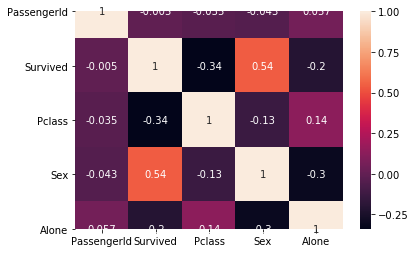

In [62]:
sns.heatmap(df_train.corr(),annot=True)

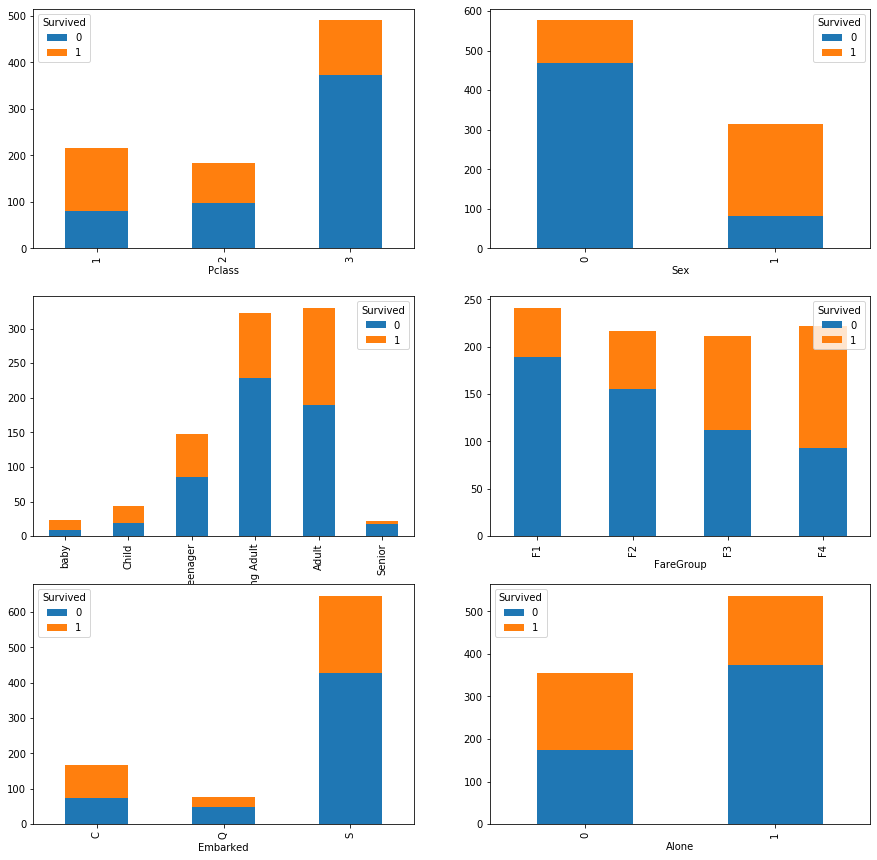

In [64]:
fig1,axes=plt.subplots(3,2,figsize=(15,15))
g1=df_train.groupby(['Pclass', 'Survived']).size().unstack().plot.bar(stacked=True,ax=axes[0,0])
g2=df_train.groupby(['Sex', 'Survived']).size().unstack().plot.bar(stacked=True,ax=axes[0,1])
g3=df_train.groupby(['AgeGroup', 'Survived']).size().unstack().plot.bar(stacked=True,ax=axes[1,0])
g4=df_train.groupby(['FareGroup', 'Survived']).size().unstack().plot.bar(stacked=True,ax=axes[1,1])
g5=df_train.groupby(['Embarked', 'Survived']).size().unstack().plot.bar(stacked=True,ax=axes[2,0])
g6=df_train.groupby(['Alone', 'Survived']).size().unstack().plot.bar(stacked=True,ax=axes[2,1])


PCLASS : The most of the 3rd class passengers seem to be reported dead and the most of 1st class passengers seem to be survived. middle class passengers have 50% chance for survival.

FAREGROUP : The passengers who purchased expensive tickets (probably the 1st class passengers) seem to have higher chance of survival.

SEX : The most of the females survived.

ALONE : People who traveled alone had less chances to survive compared to people who had family.

EMBARKED: More people got on the ship from port S and 1/3 of them survived. 

**** all in all, this infers that Females and 1st class passengers had higher chance to survive. 


In [65]:
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
Embarked         object
Alone             int64
FareGroup      category
AgeGroup       category
dtype: object

## 5. Model Selection

In [66]:

X=df_train[['Pclass','Sex','Embarked','Alone','AgeGroup','FareGroup']]
X = pd.concat([X,pd.get_dummies(X['Pclass']).astype('int64')], axis=1)
X = pd.concat([X,pd.get_dummies(X['Embarked'])], axis=1)
X = pd.concat([X,pd.get_dummies(X['AgeGroup'])], axis=1)
X = pd.concat([X,pd.get_dummies(X['FareGroup'])], axis=1)
X.head()
#X.drop(['Pclass'], axis = 1,inplace=True)
X.drop(['Pclass','Embarked','AgeGroup','FareGroup'], axis = 1,inplace=True)
    

In [69]:
X.dtypes

Sex            int64
Alone          int64
1              int64
2              int64
3              int64
C              uint8
Q              uint8
S              uint8
baby           uint8
Child          uint8
Teenager       uint8
Young Adult    uint8
Adult          uint8
Senior         uint8
F1             uint8
F2             uint8
F3             uint8
F4             uint8
dtype: object

In [67]:
X1=df_test[['Pclass','Sex','Embarked','Alone','AgeGroup','FareGroup']]
X1 = pd.concat([X1,pd.get_dummies(X1['Pclass']).astype('int64')], axis=1)
X1 = pd.concat([X1,pd.get_dummies(X1['Embarked'])], axis=1)
X1 = pd.concat([X1,pd.get_dummies(X1['AgeGroup'])], axis=1)
X1 = pd.concat([X1,pd.get_dummies(X1['FareGroup'])], axis=1)
X1.head()
#X.drop(['Pclass'], axis = 1,inplace=True)
X1.drop(['Pclass','Embarked','AgeGroup','FareGroup'], axis = 1,inplace=True)

In [70]:
X.describe(include='all')

,Sex,Alone,1,2,3,C,Q,S,baby,Child,Teenager,Young Adult,Adult,Senior,F1,F2,F3,F4
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,0.602694,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.026936,0.049383,0.166105,0.362514,0.370370,0.024691,0.270483,0.243547,0.236813,0.249158
std,0.477990,0.489615,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.161987,0.216787,0.372384,0.480996,0.483175,0.155270,0.444459,0.429463,0.425365,0.432769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
X1.describe(include='all')

,Sex,Alone,1,2,3,C,Q,S,baby,Child,Teenager,Young Adult,Adult,Senior,F1,F2,F3,F4
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,0.605263,0.255981,0.222488,0.521531,0.244019,0.110048,0.645933,0.023923,0.038278,0.148325,0.440191,0.322967,0.026316,0.284689,0.229665,0.224880,0.260766
std,0.481622,0.489380,0.436934,0.416416,0.500135,0.430019,0.313324,0.478803,0.152994,0.192095,0.355848,0.497005,0.468170,0.160265,0.451807,0.421121,0.418004,0.439578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [270]:
X.head()

,Sex,Alone,1,2,3,C,Q,S,baby,Child,Teenager,Young Adult,Adult,Senior,F1,F2,F3,F4
0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
3,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


In [271]:
X1.head()

,Sex,Alone,1,2,3,C,Q,S,baby,Child,Teenager,Young Adult,Adult,Senior,F1,F2,F3,F4
0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [72]:
# Training set
X = preprocessing.StandardScaler().fit(X).transform(X)
Y=df_train['Survived']
print(X.shape,Y.shape)

(891, 18) (891,)


Then we divide the training set for training and testing to test for model accuracy. Here we use 80% of training set for training each model and 20% for testing. 

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('X_Train set:', X_train.shape,  Y_train.shape)
print ('y_Test set:', X_test.shape,  Y_test.shape)

X_Train set: (712, 18) (712,)
y_Test set: (179, 18) (179,)


These are the models to be tested for the accuracy. 

1.KNN or k-Nearest Neighbors\
2.Support Vector Machine\
3.Decision Tree Classifier\
4.Random Forest Classifier\
5.Logistic Regression\
6.Stochastic Gradient Descent\
7.Gradient Boosting Classifier\
8.Gaussian Naive Bayes\
9.Perceptron

### 1. k-Nearest Neighbors

[0.76536313 0.82122905 0.82681564 0.83240223 0.81005587 0.80446927
 0.78212291 0.79888268 0.7877095 ]


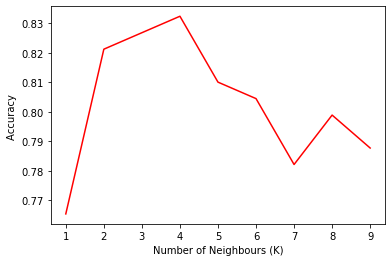

The best accuracy is with k = 4


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
K = 10
mean_acc = np.zeros((K-1)) # create a array of zeroes of shape Ks-1 i.e 9

for n in range(1,K): # The range() function returns a sequence of numbers, starting from 0 by default,
                      #.... and increments by 1 (by default), and ends at a specified number.
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train) #train the model for different k
    Yhat=knn.predict(X_test) # predict
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Yhat)

print(mean_acc)
plt.plot(range(1,K),mean_acc,'r')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()
print('The best accuracy is with k =', mean_acc.argmax()+1)

In [75]:
KNN = KNeighborsClassifier(n_neighbors = 4).fit(X_train,Y_train)
KNNhat=KNN.predict(X_test)
KNN_ac=round(metrics.accuracy_score(Y_test, KNNhat)*100,2)
KNN_ac

83.24

### 2. SVM

In [76]:
from sklearn import svm
SVM=svm.SVC(kernel='rbf').fit(X_train,Y_train)
SVMhat=SVM.predict(X_test)
SVM_ac=round(metrics.accuracy_score(Y_test, SVMhat)*100,2)
SVM_ac

84.92

### 3. Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=4).fit(X_train,Y_train)
DTChat=DTC.predict(X_test)
DTC_ac=round(metrics.accuracy_score(Y_test, DTChat)*100,2)
DTC_ac

83.24

### 4. Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier().fit(X_train,Y_train)
RFhat=RF.predict(X_test)
RF_ac=round(metrics.accuracy_score(Y_test, RFhat)*100,2)
RF_ac

79.33

### 5. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,Y_train)
LRhat=LR.predict(X_test)
LR_ac=round(metrics.accuracy_score(Y_test, LRhat)*100,2)
LR_ac

83.8

### 6. Stochastic Gradient Descent

In [80]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier().fit(X_train,Y_train)
SGDhat=SGD.predict(X_test)
SGD_ac=round(metrics.accuracy_score(Y_test, SGDhat)*100,2)
SGD_ac

67.04

### 7. Gaussian Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB().fit(X_train,Y_train)
GNBhat=GNB.predict(X_test)
GNB_ac=round(metrics.accuracy_score(Y_test, GNBhat)*100,2)
GNB_ac

78.77

### 8. Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(X_train,Y_train)
GBChat=GBC.predict(X_test)
GBC_ac=round(metrics.accuracy_score(Y_test, GBChat)*100,2)
GBC_ac

83.24

### 9. Perceptron

In [83]:
from sklearn.linear_model import Perceptron
PC = Perceptron().fit(X_train,Y_train)
PChat=PC.predict(X_test)
PC_ac=round(metrics.accuracy_score(Y_test, PChat)*100,2)
PC_ac

80.45

Let's put the results in a data frame for easy comparison

In [84]:
list1=[KNNhat,SVMhat,DTChat,RFhat,LRhat,SGDhat,GBChat,GNBhat,PChat]
list2=['KNN','SVM','Decision Tree','RandomForest','LogisticRegression',\
       'Stochastic Gradient','Gradient Boosting','Gaussian Naive','Perceptron']
accuracy=[]
# Calculating accuracy for each model
for ii in list1:
    accuracy.append(round(metrics.accuracy_score(Y_test,ii)*100,2))
    
# Results in a data frame
Results=pd.DataFrame(list(zip(list2,accuracy)),columns=['Algorithm','Accuracy'])  
Results

,Algorithm,Accuracy
0,KNN,83.24
1,SVM,84.92
2,Decision Tree,83.24
3,RandomForest,79.33
4,LogisticRegression,83.80
5,Stochastic Gradient,67.04
6,Gradient Boosting,83.24
7,Gaussian Naive,78.77
8,Perceptron,80.45


## 6. Conclusion

From the above accuracy tests, K-nearest neighbor algorithm with k=4 best predicts the survival chances of passengers.

In [85]:
X1=preprocessing.StandardScaler().fit(X1).transform(X1)
test_prediction=SVM.predict(X1)
passengerid=df_test['PassengerId']
submission = pd.DataFrame({"PassengerId": passengerid,"Survived": test_prediction})
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [89]:
# save submission data in a CSV file.
submission.to_csv ('Submission2.csv', columns = ['PassengerId', 'Survived'], index=False)